In [ ]:
#y(x,w) ) w_0 + w_1*x + w_2*x^2 + .... + w_m*x^m
#Error function
#E(w) = 1/2 * Sigma[(y(x_n,w)- t_n))^2]



In [2]:
#####Polynomial Curve Fitting , Generalized Least Squares
polynom_cf<-function(x,t,M,func){
#N<-10
#M<-4
#x <- seq(0, 1,length.out=N)
#t <- sin(2*pi*x)+rnorm(N,0,0.05)
N<-length(x)
#t <- func(x)+rnorm(N,0,0.05)
#print(x)
#print(t)
#plot(x,t)
#lines(x,t)
#curve(func(x),min(x),max(x))
X_matrix<-matrix(, nrow = M, ncol = M)
Y_matrix<-matrix(, nrow = M, ncol = 1)
y_array<-rep(0, M)
for (i in seq(0,M-1)){
    col_array<-rep(0, M)
    #print(col_array)
    power_vec<-seq(i,M-1+i)
    #print("Power Vector:")
    #print(power_vec)
    #print(paste("Power vector:",power_vec))
    for (j in seq(1,N)){
        col_array = col_array+(x[j]^power_vec)
        #print(paste("Column array:",col_array))
        #print("Column Vector:")
        #print(col_array)
        if(i == 0){
          y_array=y_array+(t[j]*(x[j]^power_vec))
            #print(y_array)
        }
    }
    X_matrix[, i+1] <- col_array
}
Y_matrix[, 1] <- y_array

W<-solve(X_matrix,Y_matrix)
return(W)
}

In [23]:
y_pred<-function(x,w){
    y_hat<-c()
    N<-length(x)
    M<-length(w)
    a<-seq(0,M-1)
    for(k in seq(1,N)){
        y_k<-sum((x[k]^a)*w)
        y_hat<-c(y_hat,y_k)
    }
    return(y_hat)
}

squared_error<-function(x,y,func){
    M_s<-seq(1,length(x))
    squared_errors<-c()
    print(y)
    for(m in M_s){
        w<-polynom_cf(x=x,t=y,M=m,func=func)
        predictions<-y_pred(x,w)
        #print(w)
        #print(predictions)
        squared_errors<-c(squared_errors,sum((y-predictions)^2))
    }
    plot(M_s,squared_errors)
    lines(M_s,squared_errors)
   #print(squared_errors)
}

rootmeansquare<-function(t,x){
    
}

In [46]:
### Generate X vector, define the function and solve linear equations for weights
N<-10
x <- seq(0, 1,length.out=N)
myfunc<-function(x){
    return(sin(2*pi*x))
}
#y <- myfunc(x)
t <- myfunc(x)+rnorm(N,0,0.1)
W<-polynom_cf(x=x,t=t,M=10,func=myfunc)
squared_error(x=x,y=t,func=myfunc)

 [1]  0.08390825  0.60139379  1.05999084  0.90245104  0.36191052 -0.32741831
 [7] -1.00817755 -1.01607042 -0.66739703  0.10821178


[1] 0 1 2 3 4 5 6 7 8 9

[,1]         
 [1,]  8.390819e-02
 [2,]  1.228569e+01
 [3,] -2.240165e+02
 [4,]  2.538900e+03
 [5,] -1.429504e+04
 [6,]  4.412799e+04
 [7,] -7.947528e+04
 [8,]  8.331233e+04
 [9,] -4.704092e+04
[10,]  1.104379e+04

[1] 1.000000e+00 1.500000e-01 2.250000e-02 3.375000e-03 5.062500e-04
 [6] 7.593750e-05 1.139062e-05 1.708594e-06 2.562891e-07 3.844336e-08

[,1]         
 [1,]  0.0839081861
 [2,]  1.8428535561
 [3,] -5.0403703136
 [4,]  8.5687876601
 [5,] -7.2368654696
 [6,]  3.3509689326
 [7,] -0.9052730829
 [8,]  0.1423469178
 [9,] -0.0120560735
[10,]  0.0004245602

[1] 0.7947249

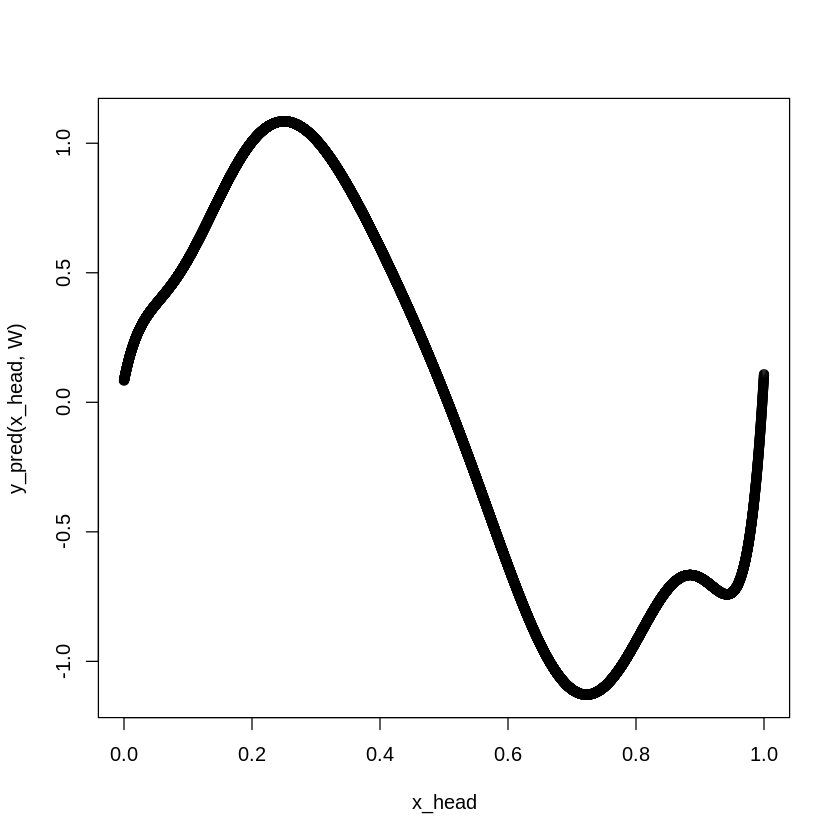

In [47]:
a<-seq(0,9)
a
W
(0.15^a)
(0.15^a)*W
sum((0.15^a)*W)
x_head <- seq(0,1,by=1e-4)
plot(x_head,y_pred(x_head,W))

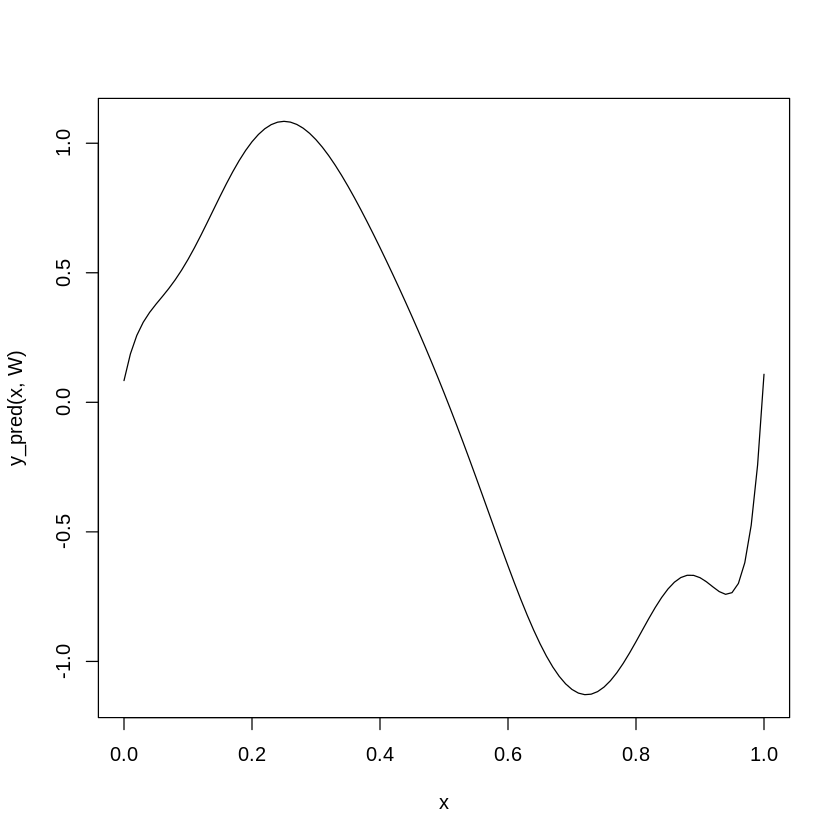

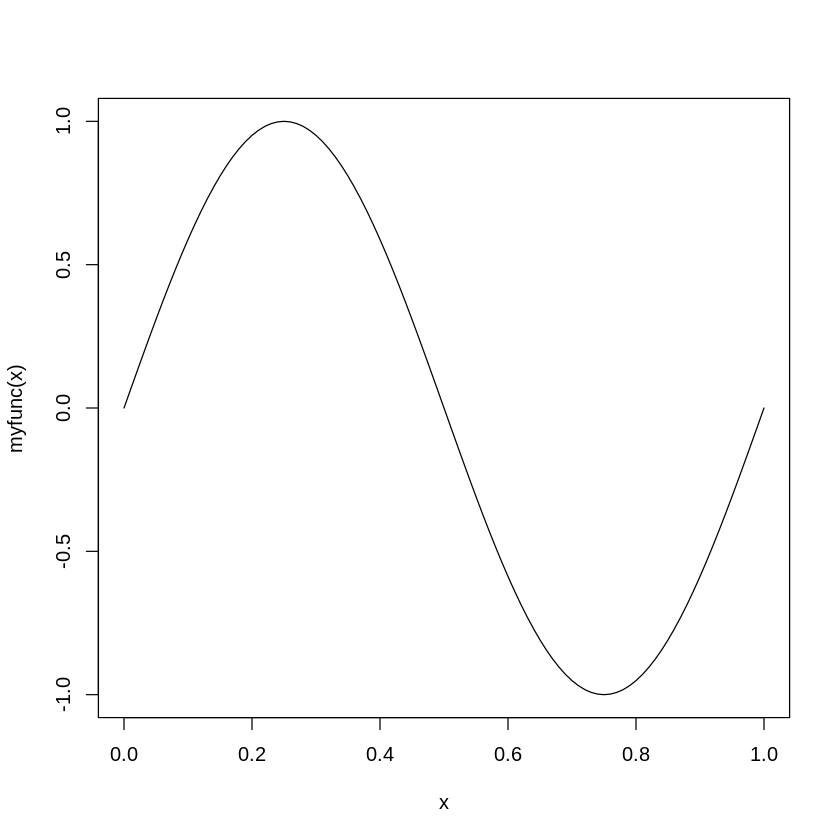

In [48]:
predictions<-y_pred(x,W)
#predictions
#plot(x,predictions)
#plot(t,predictions)
curve(y_pred(x,W),min(x),max(x))
curve(myfunc(x),min(x),max(x))

In [ ]:
#For overfitting
#One rough heuristic that is sometimes advocated is that the number of data points should be
#no less than some multiple (say 5 or 10) of the number of adaptive parameters in
#the model.
##However, the number of parameters is not
#necessarily the most appropriate measure of model complexity.
#By adopting a Bayesian approach, the over-fitting problem can be avoided
#Indeed, in a Bayesian model the effective
#number of parameters adapts automatically to the size of the data set
#One technique that is often
#used to control the over-fitting phenomenon in such cases is that of regularization,
#which involves adding a penalty term to the error function (1.2) in order to discourage
#the coefficients from reaching large values.

In [16]:
polynom_regul_cf<-function(x,t,M,func,lambda){
##Calculations are for quadratic weight normalization
N<-length(x)
#print(x)
#print(t)
#plot(x,t)
#lines(x,t)
#curve(func(x),min(x),max(x))
X_matrix<-matrix(, nrow = M, ncol = M)
Y_matrix<-matrix(, nrow = M, ncol = 1)
y_array<-rep(0, M)
for (i in seq(0,M-1)){
    col_array<-rep(0, M)
    #print(col_array)
    power_vec<-seq(i,M-1+i)
    #print("Power Vector:")
    #print(power_vec)
    #print(paste("Power vector:",power_vec))
    for (j in seq(1,N)){
        col_array = col_array+(x[j]^power_vec)
        #print(paste("Column array:",col_array))
        #print("Column Vector:")
        #print(col_array)
        if(i == 0){
          y_array=y_array+(t[j]*(x[j]^power_vec))
            #print(y_array)
        }
    }
    X_matrix[, i+1] <- col_array
}
#print(X_matrix)
Y_matrix[, 1] <- y_array
diag(X_matrix) <- diag(X_matrix)+lambda
X_matrix[1, 1] <- X_matrix[1, 1] - lambda 
#print(X_matrix)
#coefficient w0 is omitted from the regularizer because its inclusion causes the results to depend on the choice of origin for the target variable
W<-solve(X_matrix,Y_matrix)
return(W)
}

In [17]:
y_pred<-function(x,w){
    y_hat<-c()
    N<-length(x)
    M<-length(w)
    a<-seq(0,M-1)
    for(k in seq(1,N)){
        y_k<-sum((x[k]^a)*w)
        y_hat<-c(y_hat,y_k)
    }
    return(y_hat)
}

regularized_squared_error<-function(x,y,func,lambda){
    M_s<-seq(1,length(x))
    squared_errors<-c()
    print(y)
    for(m in M_s){
        w<-polynom_regul_cf(x=x,t=y,M=m,func=func,lambda=lambda)
        predictions<-y_pred(x,w)
        #print(w)
        #print(predictions)
        squared_errors<-c(squared_errors,sum((y-predictions)^2+lambda*sum(w^2))/2)
    }
    plot(M_s,squared_errors)
    lines(M_s,squared_errors)
   #print(squared_errors)
}

rootmeansquare<-function(t,x){
    
}

In [21]:
### Generate X vector, define the function and solve linear equations for weights
N<-10
x <- seq(0, 1,length.out=N)
myfunc<-function(x){
    return(sin(2*pi*x))
}
#y <- myfunc(x)
t <- myfunc(x)+rnorm(N,0,0.1)
W<-polynom_regul_cf(x=x,t=t,M=10,func=myfunc,lambda=1)
#squared_error(x=x,y=t,func=myfunc)

In [22]:
W

[,1]       
 [1,]  0.45545713
 [2,] -0.47022176
 [3,] -0.47554033
 [4,] -0.32216389
 [5,] -0.16745864
 [6,] -0.04106553
 [7,]  0.05676507
 [8,]  0.13154443
 [9,]  0.18882263
[10,]  0.23303550

In [23]:
W

[,1]       
 [1,]  0.45545713
 [2,] -0.47022176
 [3,] -0.47554033
 [4,] -0.32216389
 [5,] -0.16745864
 [6,] -0.04106553
 [7,]  0.05676507
 [8,]  0.13154443
 [9,]  0.18882263
[10,]  0.23303550

In [ ]:
#posterior ∝ likelihood × prior
#p(w|D) = p(D|w)*p(w)/p(D)
#The quantity p(D|w) on the right-hand side of Bayes’ theorem is evaluated for
#the observed data set D and can be viewed as a function of the parameter vector
#w, in which case it is called the likelihood function
#The denominator is the normalization constant
#we can express the denominator in Bayes’ theorem in terms of the prior distribution and the likelihood function
#p(D) = Integration over w(p(D|w)*p(w)*dw)

#In a frequentist setting, w is considered to be a fixed parameter, whose value is determined by some form of ‘estimator’, and error bars
#on this estimate are obtained by considering the distribution of possible data sets D

#from the Bayesian viewpoint there is only a single data set D (namely the one that is actually observed)
#and the uncertainty in the parameters is expressed through a probability distribution over w.



In [58]:
calc_norm<- function(low,up,y_s,stdev){
  mu_head <- seq(low,up,by=1e-2)
  likelihood <- 1
  for (y in y_s){
    likelihood <- likelihood * dnorm(y,mean = mu_head, sd = stdev)
  }
  plot(mu_head,likelihood)
  likelihood_df<-data.frame(mu_head,likelihood)
  mle<-max(likelihood_df[2])
  print(subset(likelihood_df, likelihood_df[2] == mle))
}

In [65]:
#bootstrap method for likelihood estimation
bootstrap <- function(L,y_s){
    res_mu_head = c()
    N<-length(y_s)
    for(i in seq(L)){
    smpl<-sample(y_s, N, replace = TRUE, prob = NULL)
        res_mu_head <- c(res_mu_head, mean(smpl))
        print(smpl)
    }
    hist(res_mu_head)
    print(mean(res_mu_head))
}

    mu_head   likelihood
458    4.57 2.299116e-09
[1] 4.569508
 [1] 5.914206 2.140649 7.769310 5.353437 5.353437 6.287049 5.914206 4.362102
 [9] 4.362102 2.156351
 [1] 6.287049 4.880198 4.362102 3.306946 5.353437 2.140649 4.880198 5.353437
 [9] 3.524834 3.306946
 [1] 2.140649 5.914206 6.287049 7.769310 5.353437 2.156351 5.914206 5.353437
 [9] 4.362102 3.524834
 [1] 4.362102 6.287049 2.156351 7.769310 7.769310 3.306946 5.914206 6.287049
 [9] 4.880198 3.306946
 [1] 4.362102 4.362102 2.140649 5.353437 4.880198 4.362102 4.362102 2.156351
 [9] 4.362102 7.769310


[1] 4.758683


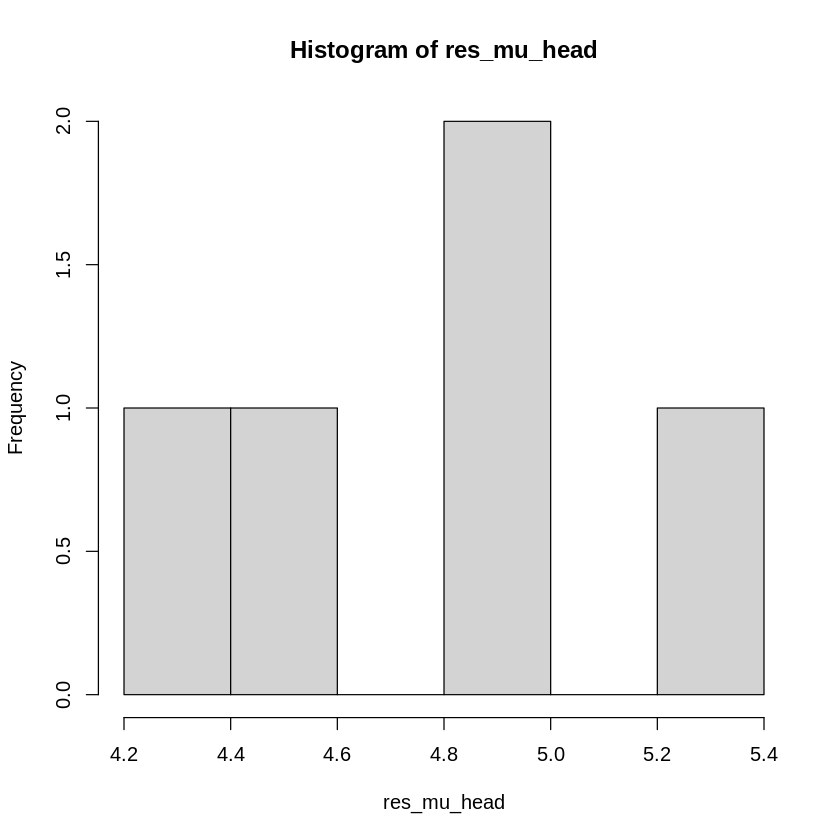

In [67]:
mu <- 5
stdev <- 2
N<-10
L<-5
y_s <- rnorm(N,mean=mu,sd = stdev)
calc_norm(0,10,y_s,stdev)
print(mean(y_s))
bootstrap(L,y_s)

In [ ]:
#We can express our uncertainty over the value of the target variable using a probability distribution
#For this purpose, we shall assume that, given the value of x, the corresponding value of t has a Gaussian distribution
#with a mean equal to the value y(x,w) of the polynomial curve given by y(x,w)=w_0 + w_1*x + w_2*x^2 + ..... + w_m*x^m
# Thus, P(t | y(x,W) , B^-1) where B^-1 is defined as precision parameter which is the inverse of variance
#The overal probability and the likelihood becomes in the gaussian setting
#log(P(t | X,w,B) ) = -B/2 Epsilon({y(x_n,w) - t_n }^2) + N/2 logB - N/2 log(2*pi)
#if we were to maximize this with respect to W the right 2 terms diminish and we can replace the B/2 with 1/2 because positive
#constant coefficient does not alter the location of the maximum with respect to w
#Therefore maximizing likelihood is equivalent to minimizing sum of square function with respect to w under the assumption that the mean vector of Gaussian is determined
#by the function y and they share the same variance.
# sum of squares error function E(w) = 1/2 * Epsilon(y(x_n,w) - t_n)^2
#Using the maximum likelihood with regard the precision parameter B the equation becomes
#1/B = 1/N * Epsilon({y_n - t_n}^2)

In [21]:
#####Gaussian Curve Fitting 
y_pred<-function(x,w){
    y_hat<-c()
    N<-length(x)
    M<-length(w)
    a<-seq(0,M-1)
    for(k in seq(1,N)){
        y_k<-sum((x[k]^a)*w)
        y_hat<-c(y_hat,y_k)
    }
    return(y_hat)
}
gaussian_polynom_cf<-function(x,t,M,func){
#N<-10
#M<-4
#x <- seq(0, 1,length.out=N)
#t <- sin(2*pi*x)+rnorm(N,0,0.05)
N<-length(x)
#t <- func(x)+rnorm(N,0,0.05)
#print(x)
#print(t)
#plot(x,t)
#lines(x,t)
#curve(func(x),min(x),max(x))
X_matrix<-matrix(, nrow = M, ncol = M)
Y_matrix<-matrix(, nrow = M, ncol = 1)
y_array<-rep(0, M)
for (i in seq(0,M-1)){
    col_array<-rep(0, M)
    #print(col_array)
    power_vec<-seq(i,M-1+i)
    #print("Power Vector:")
    #print(power_vec)
    #print(paste("Power vector:",power_vec))
    for (j in seq(1,N)){
        col_array = col_array+(x[j]^power_vec)
        #print(paste("Column array:",col_array))
        #print("Column Vector:")
        #print(col_array)
        if(i == 0){
          y_array=y_array+(t[j]*(x[j]^power_vec))
            #print(y_array)
        }
    }
    X_matrix[, i+1] <- col_array
}
Y_matrix[, 1] <- y_array

W<-solve(X_matrix,Y_matrix)
y_vals <- y_pred(x,W)
sigma_hat_squared<- sum((y_vals - t)^2)/N
response_list<-list(W=W,sigma_ml=sqrt(sigma_hat_squared))
return(response_list)
}

In [22]:
squared_gaussian_polynom_error<-function(x,y,func){
    M_s<-seq(1,length(x))
    squared_errors<-c()
    print(y)
    for(m in M_s){
        responses<-gaussian_polynom_cf(x=x,t=y,M=m,func=func)
        predictions<-y_pred_gaussian_polynom(x,responses$W,responses$sigma_ml)
        #print(w)
        #print(predictions)
        squared_errors<-c(squared_errors,sum((y-predictions)^2))
    }
    plot(M_s,squared_errors)
    lines(M_s,squared_errors)
   #print(squared_errors)
}
y_pred_gaussian_polynom<-function(x,w,sigma_ml){
    y_hat<-c()
    N<-length(x)
    M<-length(w)
    a<-seq(0,M-1)
    for(k in seq(1,N)){
        y_k<-sum((x[k]^a)*w)
        y_c<-rnorm(1,y_k,sigma_ml)
        y_hat<-c(y_hat,y_c)
    }
    return(y_hat)
}

In [29]:
N<-10
x <- seq(0, 1,length.out=N)
myfunc<-function(x){
    return(sin(2*pi*x))
}
#y <- myfunc(x)
t <- myfunc(x)+rnorm(N,0,0.1)
#responses<-gaussian_polynom_cf(x=x,t=t,M=10,func=myfunc)
squared_gaussian_polynom_error(x=x,y=t,func=myfunc)

 [1]  0.08601578  0.46025069  0.92968439  0.83525958  0.30161795 -0.29837617
 [7] -0.92207759 -0.97226164 -0.63437496 -0.08578090


In [28]:
#We first determine the parameter vector W_ml governing the mean and subsequently use this to find precision sigma_ml as was the case for simple Gaussian distribution
#Having determined the parameters w and sigma, we can make predictions for new values of x.
#Because now have a probabilistic model, these are expressed in terms of the predictive distribution that gives the probability distribution over t rather than simply a point estimate.
#If we substitute the parameters obtained by maximum likelihood our equation becomes
#p(t | x,w_ml,sigma_ml) = N(t | y(x,w_ml) , sigma_ml)

[1] 3.826101e-06

In [ ]:
#We can now take a step towards a more Bayesian approach and introduce a prior distribution over the polynomial coefficents w.
#For simplicity, let us consider a Gaussian distribution of the form
# p(w | a) = N(w | 0,a^-1*I) = (a/2pi)^(M+1)/2 *exp(-a/2*w^t*w)
#where a is the precision of the distribution and M+1 is the total number of elements in the vector w for an Mth order polynomial.
#Variables such a, which control the distribution of model parameters are called hyperparameters.
#Here a is assumed to be a scalar and regarding w's independence is assumed hence the identity matrix is used. 
#Therefore the exponent can be written as -a/2*w^t*w => w^t*[(a-1*I)^-1]*w  => w^t*a*(I^-1)*w => w^t*a*I*w => a*w^t*w


In [ ]:
#P(theta | D) = p(D | theta) * p(theta) / p(D) = p(D | theta) * p(theta) / Integration_over_theta(p(D | theta) * p(theta))
#This shows how from a forward or generative model p(D |theta) of the dataset, and coupled with a prior belief
#p(theta) about which variable values are appropriate, we can infer the posterior distribution p(theta | D) of the variable
#in light of the observed data.
#The most probable a posteriori (MAP) setting is that which maximises the posterior, theta_hat = arg max_theta p(theta | D)

In [ ]:
#For a at prior', p(theta) being a constant, not changing with theta, the MAP
#solution is equivalent to the maximum likelihood, namely that theta that maximises the likelihood p(D| theta) of the
#model generating the observed data

In [ ]:
#Using Bayes’ theorem, the posterior distribution for w is proportional to the product of the prior
#distribution and the likelihood function
# p(w | x,t , a, b) ~ p(t | x,w ,b) * p(w| a)

In [ ]:
#p(t | x,w ,b) * p(w| a) =
#B/(2pi)^-1 * e^{-B/2 * (t-y(x,w))*(t-y(x,w))} * (a/2pi)^(M+1/2) * e{-a/2 *w^t*w}
#taking log of equation and maximizing log likelihood or taking -log and minimizing it
# =>Maximize log => logB -1/2log(2pi) -B/2[(t-y(x,w))*(t-y(x,w))] +(m+1)/2 * [loga -log2pi] -a/2*w^t*w
# =>Minimize -log => -logB +1/2log(2pi) +B/2[(t-y(x,w))*(t-y(x,w))] -(m+1)/2 * [loga -log2pi] + a/2*w^t*w